In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('masterfile.csv',index_col='Date',parse_dates=True)
df=df.dropna()
df

,deaths,cases,total_doses,cumulative_total_doses
Date,,,,
2020-07-27,149,9087,5,6
2020-07-28,129,8799,6,12
2020-07-29,157,7812,9,21
2020-07-30,147,7239,13,34
2020-07-31,148,7215,6,40
...,...,...,...,...
2022-10-13,3,2241,93360,81214586
2022-10-14,0,1670,119568,81334154
2022-10-15,1,1088,49843,81383997


In [31]:
df = df.drop(['cumulative_total_doses'], axis=1)

<AxesSubplot:xlabel='Date'>

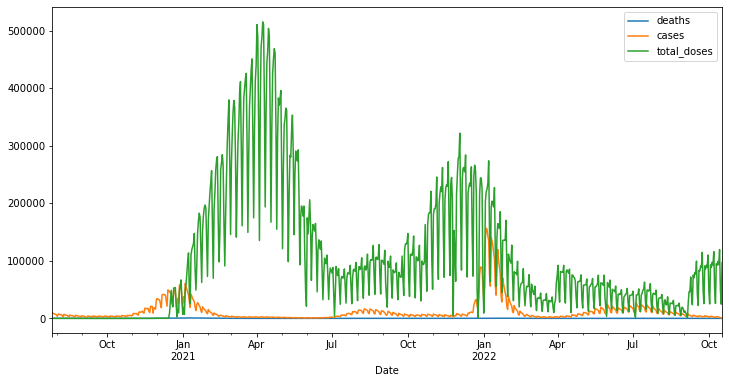

In [32]:
df.plot(figsize=(12,6))

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

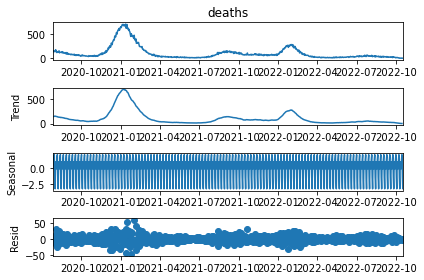

In [34]:
results = seasonal_decompose(df['deaths'])
results.plot();

In [35]:
diffs = df['deaths'].diff()

In [36]:
diffs.dropna(inplace=True)

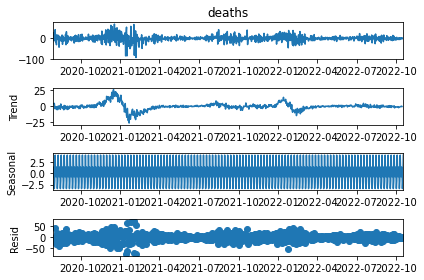

In [37]:
results = seasonal_decompose(diffs)
results.plot();

In [38]:
diffs2 = diffs.diff()

In [39]:
diffs2.dropna(inplace=True)

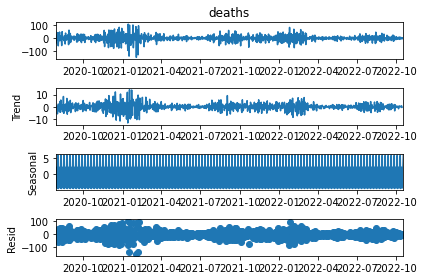

In [40]:
results2 = seasonal_decompose(diffs2)
results2.plot();

In [41]:
from statsmodels.tsa.stattools import adfuller
def ad_test(diffs2):
     dftest = adfuller(diffs2, autolag = 'AIC')
     print("1. ADF : ", dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [42]:
ad_test(diffs2)

1. ADF :  -5.937321000898277
2. P-Value :  2.3044604427449688e-07
3. Num Of Lags :  18
4. Num Of Observations Used For ADF Regression: 792
5. Critical Values :
	 1% :  -3.438633612472885
	 5% :  -2.865196199232788
	 10% :  -2.5687169024206713


In [43]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [44]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['deaths'], d = 2, trace=True,
                          suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=6516.246, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=7630.245, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=7213.692, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=6832.972, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=6515.604, Time=0.14 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=6514.341, Time=0.26 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=6515.514, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=6671.413, Time=0.08 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=6516.242, Time=0.16 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=6516.339, Time=0.47 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 1.533 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  813
Model:               SARIMAX(0, 2, 2)   Log Likelihood               -3254.170
Date:                Tue, 15 Nov 2022   AIC                           6514.341
Time:                        17:21:44   BIC                           6528.435
Sample:                    07-27-2020   HQIC                          6519.752
                         - 10-17-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.6287      0.017    -95.016      0.000      -1.662      -1.595
ma.L2          0.7197      0.017     42.753      0.000       0.687       0.753
sigma2       178.1447      4.916     36.234      0.000     168.509     187.781
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):               935.40
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
from statsmodels.tsa.arima.model import ARIMA

In [46]:
print(df['deaths'].shape)
train=df['deaths'].iloc[:-14]
test=df['deaths'].iloc[-14:]
print(train.shape,test.shape)

(813,)
(799,) (14,)


In [47]:
#fits entire dataframe
model=ARIMA(train, order=(0,2,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 deaths   No. Observations:                  799
Model:                 ARIMA(0, 2, 2)   Log Likelihood               -3204.686
Date:                Tue, 15 Nov 2022   AIC                           6415.372
Time:                        17:21:51   BIC                           6429.415
Sample:                    07-27-2020   HQIC                          6420.767
                         - 10-03-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.6289      0.017    -93.463      0.000      -1.663      -1.595
ma.L2          0.7198      0.017     42.058      0.000       0.686       0.753
sigma2       181.1489      5.090     35.588      0.000     171.172     191.126
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):               874.21
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# #fits training dataframe
# model=ARIMA(train, order=(1,0,2))
# model=model.fit()
# model.summary()

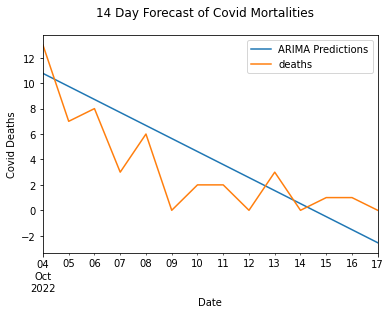

In [48]:
#Models Test forcast (14 days) and actual predictions
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test.plot(legend=True)
plt.suptitle('14 Day Forecast of Covid Mortalities')
plt.ylabel('Covid Deaths')
plt.savefig('ARIMA(14day)Mortalitypred.png')

In [49]:
from statsmodels.tsa.stattools import acf


In [50]:
from datetime import datetime

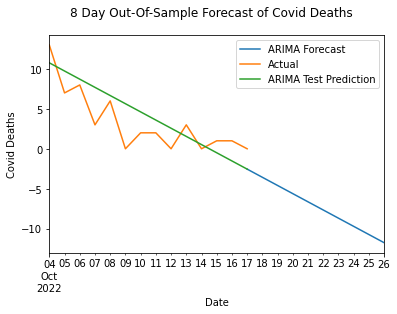

In [51]:
#Out of sample 8 Day Forecast
start_index = datetime(2022, 10, 17)
end_index = datetime(2022, 10, 26)
fore = model.predict(start=start_index, end=end_index, typ='levels').rename('ARIMA Forecast')
fore.plot(legend=True)
test.plot(legend=True, label = 'Actual')
pred.plot(legend=True, label = 'ARIMA Test Prediction')
plt.suptitle('8 Day Out-Of-Sample Forecast of Covid Deaths')
plt.ylabel('Covid Deaths')
plt.savefig('ARIMA(14day)oosDeathprediction.png')

In [52]:
residuals = model.resid
residuals[-14:]

Date
2022-09-20     3.071652
2022-09-21     0.311143
2022-09-22   -10.704086
2022-09-23     7.340219
2022-09-24    -3.338998
2022-09-25     9.277801
2022-09-26    -1.484106
2022-09-27    -1.095404
2022-09-28    -5.716072
2022-09-29    -1.522430
2022-09-30    -9.365579
2022-10-01    -2.159729
2022-10-02     5.223162
2022-10-03     3.062504
dtype: float64

<AxesSubplot:xlabel='Date'>

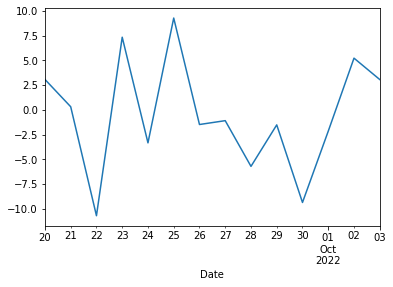

In [53]:
residuals = model.resid
residuals[-14:].plot()

<AxesSubplot:ylabel='Density'>

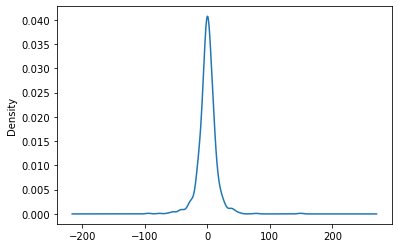

In [54]:
residuals.plot(kind='kde')

In [55]:
residuals.describe()

count    799.000000
mean       0.086680
std       14.918559
min      -94.490346
25%       -5.854910
50%        0.290758
75%        6.612065
max      149.000000
dtype: float64

In [56]:
from sklearn import metrics
import pprint

In [57]:
mape = np.mean(np.abs(pred - test)/np.abs(test)) #mean absolute percentage error
mae = np.mean(np.abs(pred - test)) #mean absolute error
mpe = np.mean(np.abs(pred - test)/(test)) #mean percentage error
mse = metrics.mean_squared_error(test, pred) #mean squared error
rmse = np.mean((pred - test)**2)**.5 #RMSE
corr = np.corrcoef(pred, test)[0,1] #correlation coefficient

mins = np.amin(np.hstack([pred[:,None], test[:,None]]), axis =1)
maxs = np.amax(np.hstack([pred[:,None], test[:,None]]), axis =1)
minmax = 1 - np.mean(mins/maxs) #minmax

pprint.pprint({'mape':mape, 'mae':mae, 'mpe':mpe, 'mse':mse, 'rmse': rmse, 'corr':corr, 'minmax':minmax})

{'corr': 0.7931724216163928,
 'mae': 2.2899580151562686,
 'mape': inf,
 'minmax': inf,
 'mpe': inf,
 'mse': 7.2148866349589325,
 'rmse': 2.6860541012717767}
